# Material Modeling 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

We will first look at an example using Snell's Law also known as the Law of Refraction. Light rays reflect differently off of a different medium depending on the incident medium's refraction index and outgoing medium's refraction index. The two angles of the incoming and outgoing ray can be found using Snell's Law. Some example index of refractions are shown for mediums in the table below. Note that when n1/n2 > 1, there is total internal refraction.

![](https://drive.google.com/uc?export=view&id=1lXNqitn1QX89-6bgg1WK-s25tZ7de6hK)
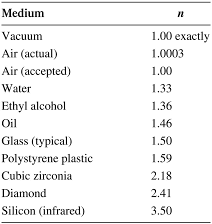

In [2]:
def calc_theta2(theta1, n1, n2):
  '''
  Returns the outgoing angle theta2 in radians using Snell's Law.
  theta1 is given in radians, and n1 and n2 are the indices of refraction.
  '''
  theta2 = np.arcsin(n1 / n2 * np.sin(theta1))
  print('Outgoing angle theta2: %2f'%(np.degrees(theta2)))
  return theta2


def plot_snells_law(theta1, n1, n2):
  '''
  Plots the incoming and outgoing lightrays between two different materials 
  with indices of refraction n1 and n2, respectively. 
  '''
  # calculate ray positions
  theta1 = np.radians(theta1)
  ray_i_x, ray_i_y = -np.sin(theta1), np.cos(theta1)
  theta2 = calc_theta2(theta1, n1, n2)
  ray_t_x, ray_t_y = np.sin(theta2), -np.cos(theta2)

  # plot the incoming and outgoing rays
  plt.arrow(ray_i_x, ray_i_y, -ray_i_x, -ray_i_y, color='green', width=0.005, head_width=0.05, length_includes_head=True)
  plt.arrow(0, 0, ray_t_x, ray_t_y, color='red', width=0.005, head_width=0.05, length_includes_head=True)
  
  plt.fill_between([-3,3], [0,0], [-3,-3], alpha=0.5)
  plt.vlines(0,-2, 2, linestyle='--', lw=0.7)
  plt.hlines(0, -2, 2)
  plt.xlim(-1, 1)
  plt.ylim(-1, 1)
  plt.text(0.8, 0.5, 'n1')
  plt.text(0.8, -0.5, 'n2')

interactive_plot = interactive(plot_snells_law, theta1=(1e-6,90), n1=(1.0,4.0), n2=(1.0,4.0))  # index starts from zero
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=45.0000005, description='theta1', max=90.0, min=1e-06), FloatSlider(va…

## Visualizing lobes

We'll plot the Beckmann normal distribution function, which isn't a BRDF itself but is a component of most microfacet BRDF models.

In [3]:
normalize = lambda z : z / np.linalg.norm(z, axis=-1, keepdims=True)

# w_i is light, w_o is 
def beckmann_fn(m):

  def brdf(w_i, w_o):
    h = normalize(w_i + w_o)
    n = np.array([0., 1.])
    alpha = np.arccos(np.maximum(0, np.sum(n * h, -1)))

    return np.exp(-np.tan(alpha)**2/m**2) / (np.pi*m**2*np.cos(alpha)**4)

  return brdf

In [4]:
def callback_fn(theta, alpha):

  w_i = np.array([np.cos(theta/180*np.pi), np.sin(theta/180*np.pi)])

  th = np.linspace(0, np.pi, 256+1)
  w_o = np.stack([np.cos(th), np.sin(th)], -1)

  brdf = beckmann_fn(alpha)
  rads = brdf(w_i, w_o)
  pts = w_o * rads[:,None]

  plt.figure(2, figsize=(6,3))
  plt.plot(*pts.T)
  sc = 1./alpha**2 * .5
  plt.arrow(0, 0, *(w_i*sc))
  plt.xlim(-sc, sc)
  plt.ylim(0, sc)
  plt.show()
  

callback_kwargs = {
    'theta': widgets.IntSlider(value=90, min=0, max=180),
    'alpha': widgets.FloatLogSlider(value=.05, min=-2, max=0),
}

interactive_plot = interactive(callback_fn, **callback_kwargs)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=90, description='theta', max=180), FloatLogSlider(value=0.05, descriptio…